In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
pd.set_option('display.max_rows', 10)
# Show the full results
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)

matplotlib.rcParams['figure.figsize'] = (20, 10)

In [124]:
df = pd.read_csv('../Data/Engineered.csv')
df.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [125]:
df.shape

(13200, 6)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  int64  
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   price_per_sqft  13200 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 618.9+ KB


###### Remove unrealistic data point ( home with large number of rooms with small total sqft)

In [127]:
df1 = df[~(df['total_sqft']/df['size'] < 300)]
df1.shape

(12456, 6)

###### Check price per square feat

In [128]:
df1.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [129]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df2 = remove_pps_outliers(df1)
df2.shape

(10245, 6)

###### Visualize Oultier in a certain location

In [130]:
bhk2 = df2[(df2.location == "Rajaji Nagar") & (df2['size'] == 2)]
bhk2

,location,size,total_sqft,bath,price,price_per_sqft
5731,Rajaji Nagar,2,1370.0,2.0,170.0,12408.759124
5734,Rajaji Nagar,2,1718.0,3.0,288.0,16763.678696
5737,Rajaji Nagar,2,1200.0,2.0,150.0,12500.000000
5738,Rajaji Nagar,2,1160.0,1.0,163.0,14051.724138
5740,Rajaji Nagar,2,1440.0,2.0,170.0,11805.555556
5742,Rajaji Nagar,2,1440.0,2.0,185.0,12847.222222
5749,Rajaji Nagar,2,1357.0,2.0,130.0,9579.955785
5756,Rajaji Nagar,2,1763.0,3.0,262.0,14861.032331
5763,Rajaji Nagar,2,1268.0,2.0,127.0,10015.772871
5766,Rajaji Nagar,2,1200.0,1.0,200.0,16666.666667


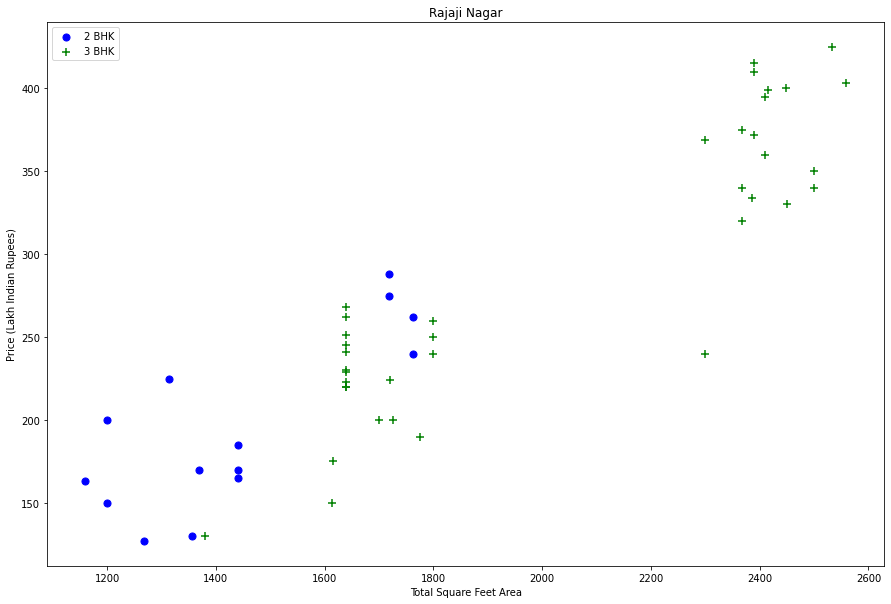

In [131]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df['size'] == 2)]
    bhk3 = df[(df.location == location) & (df['size'] == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df2,"Rajaji Nagar")

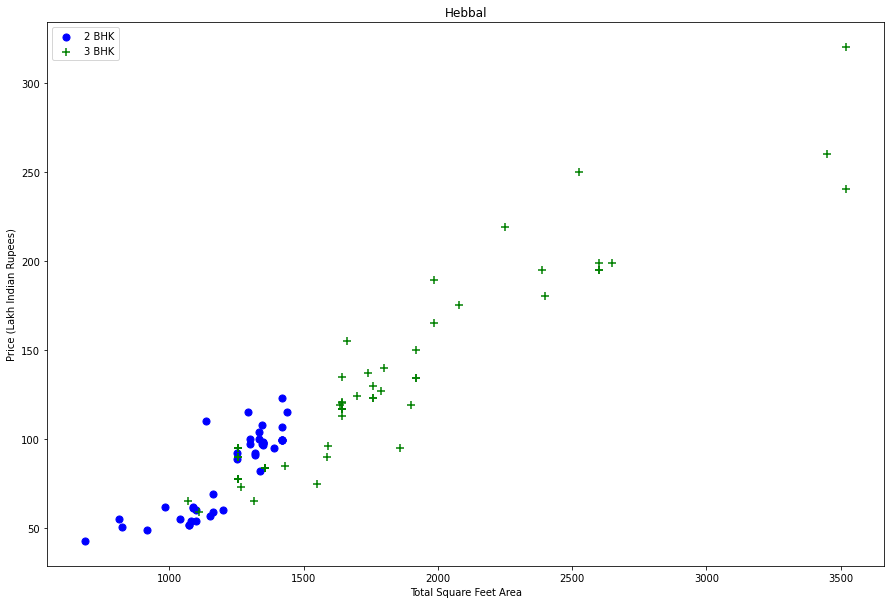

In [132]:
plot_scatter_chart(df2,"Hebbal")

###### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [133]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df3 = remove_bhk_outliers(df2)
df3.shape

(7331, 6)

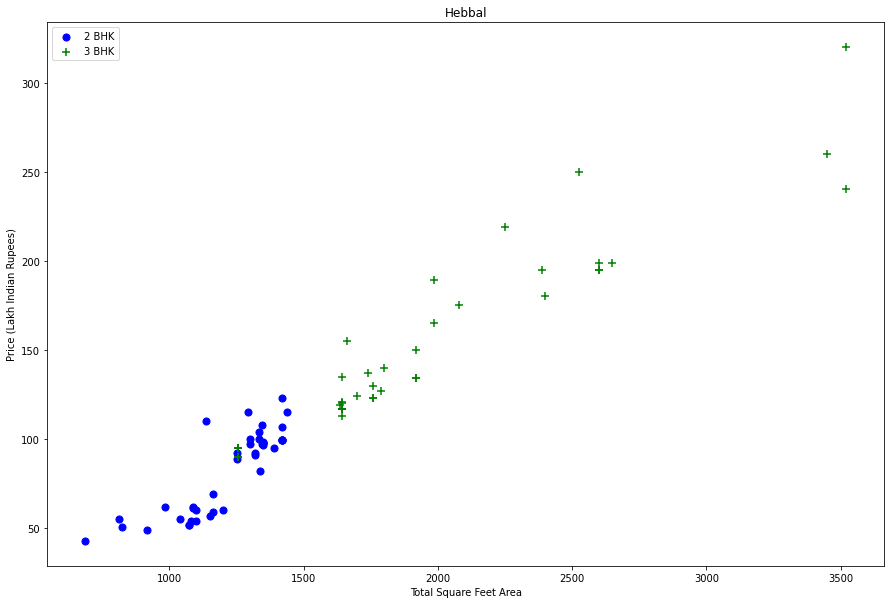

In [134]:
plot_scatter_chart(df3,"Hebbal")

#####  Outlier Removal Using Bathrooms Feature

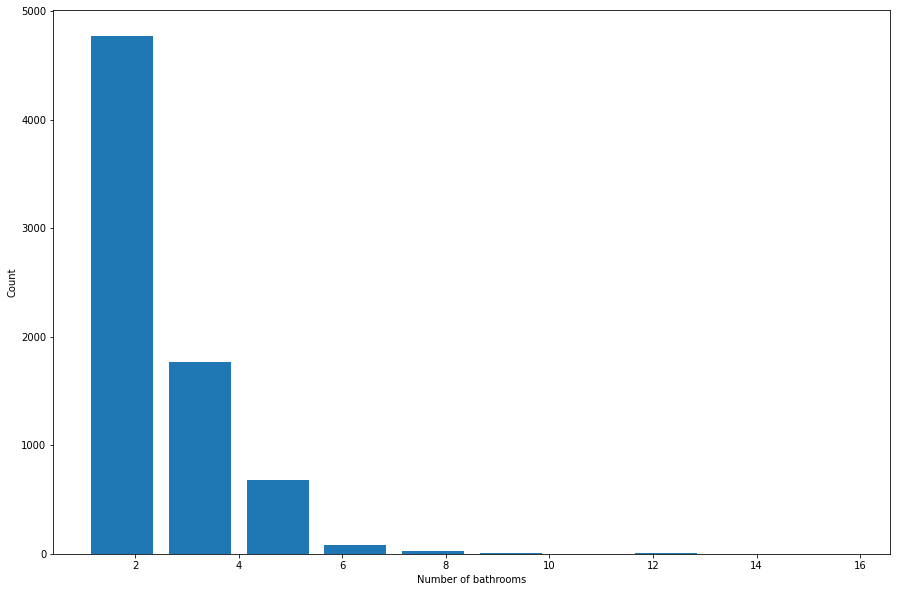

In [135]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.show();

In [136]:
df4 = df3[df3.bath < df3['size'] + 2]
df4.head()

,location,size,total_sqft,bath,price,price_per_sqft
1,Devarachikkanahalli,2,1250.0,2.0,40.0,3200.000000
2,Devarachikkanahalli,2,1200.0,2.0,83.0,6916.666667
3,Devarachikkanahalli,2,1170.0,2.0,40.0,3418.803419
4,Devarachikkanahalli,3,1425.0,2.0,65.0,4561.403509
5,Devarachikkanahalli,2,947.0,2.0,43.0,4540.654699


#### Remove unwanted features

In [137]:
df5 = df4.drop(['price_per_sqft'],axis='columns')
df5.head(3)

,location,size,total_sqft,bath,price
1,Devarachikkanahalli,2,1250.0,2.0,40.0
2,Devarachikkanahalli,2,1200.0,2.0,83.0
3,Devarachikkanahalli,2,1170.0,2.0,40.0


In [142]:
df5.to_csv('../Data/4_out_rem.csv', index = False)